<a href="https://colab.research.google.com/github/mad-scientist-in-training/COVID-TB-Tracking/blob/main/Python_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is a project which utilizes a simple created package of a pandas dataframe, 'World COVID-19 cases and BCG vaccinations', to visualize whether there is a correlation between BCG vaccination and COVID-19 cases, along with statistical analysis using numpy to see if this is true.

                  Country  COVID_cases BCG_vaccination
0                     USA      1134084           False
1                   Spain       245567           False
2                   Italy       207428           False
3                      UK       117454           False
4                  France       167346           False
..                    ...          ...             ...
205             St. Barth            6            True
206        Western Sahara            6              NA
207              Anguilla            3            True
208               Comoros            1            True
209  Saint Perre Miquelon            1            True

[210 rows x 3 columns]


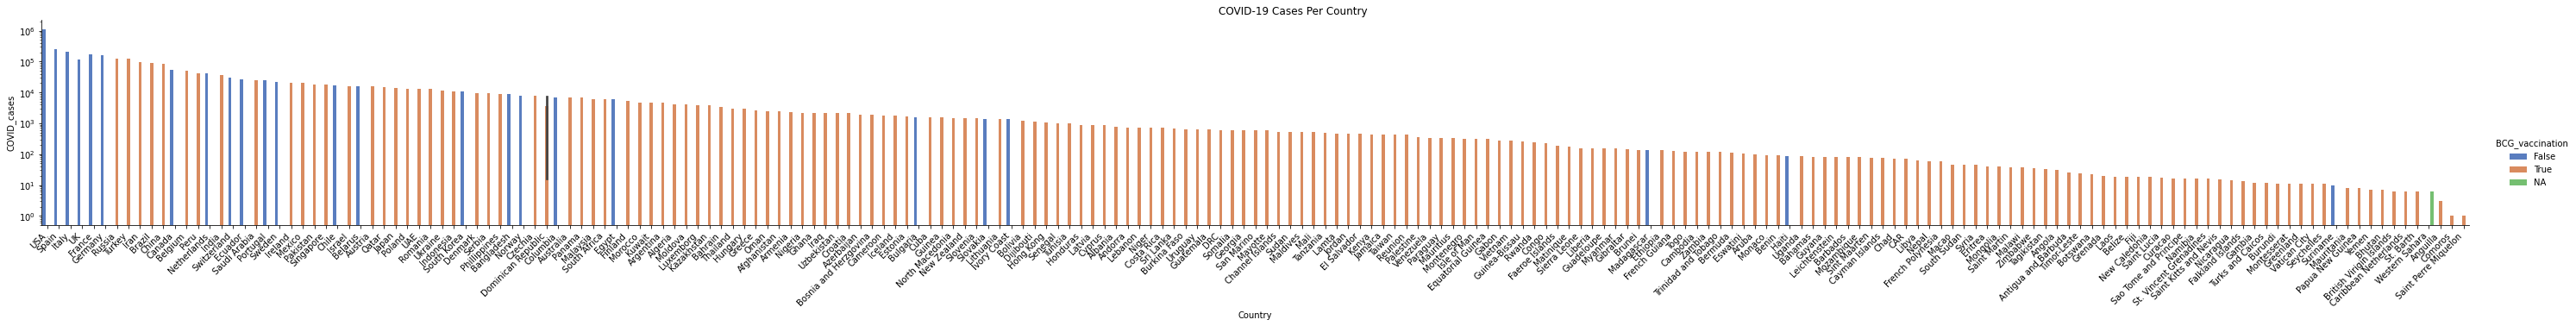

In [3]:
# import necessary packages for creating a dataframe from a dictionary, graphing the data, and use statistical analysis to determine correlations between the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#create a dictionary of COVID-19 cases per country, and whether those countries vaccinate with BCG, note if the country vaccinates routinely, BCG_vaccination = TRUE. 
COVID_dict = {'Country': ['USA', 'Spain', 'Italy', 'UK', 'France', 'Germany', 'Russia', 'Turkey', 'Iran', 'Brazil', 'China', 'Canada', 'Belgium', 'Peru', 'Netherlands', 'India', 'Switzerland', 'Ecuador', 'Saudi Arabia', 'Portugal', 'Sweden', 'Ireland', 'Mexico', 'Pakistan', 'Singapore', 'Chile', 'Israel', 'Belarus', 'Austria', 'Qatar', 'Japan', 'Poland', 'UAE', 'Romania', 'Ukraine', 'Indonesia', 'South Korea', 'Denmark', 'Serbia', 'Phillippines', 'Bangladesh', 'Norway', 'Czechia', 'Dominican Republic', 'Columbia', 'Australia', 'Panama', 'Malaysia', 'South Africa', 'Egypt', 'Finland', 'Morocco', 'Kuwait', 'Argentina', 'Algeria', 'Moldova', 'Luxemborg', 'Kazakhstan', 'Bahrain', 'Thailand', 'Hungary', 'Greece', 'Oman', 'Afghanistan', 'Armenia', 'Nigeria', 'Ghana', 'Iraq', 'Uzbekistan', 'Croatia', 'Azerbaijan', 'Bosnia and Herzgovina', 'Cameroon', 'Iceland', 'Estonia', 'Bulgaria', 'Cuba', 'Guinea', 'North Macedonia', 'New Zealand', 'Slovenia', 'Slovakia', 'Lithuania', 'Ivory Coast', 'Bolivia', 'Dijibouti', 'Hong Kong', 'Senegal', 'Tunisia', 'Honduras', 'Latvia', 'Cyprus', 'Albania', 'Andorra', 'Lebanon', 'Niger', 'Costa Rica', 'Sri Lanka', 'Burkina Faso', 'Uruguay', 'Guatemala', 'DRC', 'Somalia', 'Georgia', 'San Marino', 'Mayotte', 'Channel Islands', 'Sudan', 'Maldives', 'Mali', 'Tanzania', 'Lamta', 'Jordan', 'El Salvador', 'Kenya', 'Jamaica', 'Taiwan', 'Reunion', 'Palestine', 'Venezuela', 'Paraguay', 'Mauritius', 'Montenegro', 'Isle of Man', 'Equatorial Guinea', 'Gabon', 'Vietnam', 'Guinea-Bissau', 'Rwanda', 'Congo', 'Faeroe Islands', 'Matinique', 'Sierra Leone', 'Liberia', 'Guadeloupe', 'Myanmar', 'Gibraltar', 'Brunei', 'Madagascar', 'Ethiopia', 'French Guiana', 'Togo', 'Cambodia', 'Zambia', 'Trinidad and Tobago', 'Bermuda', 'Eswatini', 'Aruba', 'Monaco', 'Benin', 'Haiti', 'Uganda', 'Bahamas', 'Guyana', 'Leichtenstein', 'Barbados', 'Mozambique', 'Sint Maarten', 'Cayman Islands', 'Chad', 'CAR', 'Libya', 'Nepal', 'French Polynesia', 'Macao', 'South Sudan', 'Syria', 'Eritrea', 'Mongolia', 'Saint Martin', 'Malawi', 'Zimbabwe', 'Tagikistan', 'Angola', 'Antigua and Barbuda', 'Timor-Leste', 'Botswana', 'Grenada', 'Laos', 'Belize', 'Fiji', 'New Caledonia', 'Saint Lucia', 'Curacao', 'Sao Tome and Principe', 'Dominican Republic', 'Namibia', 'St. Vincent Grenadines', 'Saint Kitts and Nevis', 'Nicaragua', 'Falkland Islands', 'Gambia', 'Turks and Caicos', 'Burundi', 'Montesserat', 'Greenland', 'Vatican City', 'Seychelles', 'Suriname', 'Mauritania', 'Papua New Guinea', 'Yemen', 'Bhutan', 'British Virigin Islands', 'Caribbean Netherlands', 'St. Barth', 'Western Sahara', 'Anguilla', 'Comoros', 'Saint Perre Miquelon'],
              'COVID_cases': [1134084, 245567, 207428, 117454, 167346, 164197, 124054, 122392, 96448, 92630, 82875, 55061, 49517, 40549, 40236, 37336, 29817, 26336, 25459, 25190, 22082, 20833, 20739, 18114, 17548, 17008, 16152, 15828, 15558, 14872, 14305, 13375, 13038, 12732, 11411, 10843, 10780, 9407, 9362, 8928, 8790, 7783, 7740, 7288, 7006, 6783, 6720, 6176, 5951, 5895, 5176, 4687, 4619, 4532, 4154, 4052, 3802, 3800, 3273, 2966, 2942, 2612, 2483, 2469, 2273, 2170, 2169, 2153, 2094, 2088, 1894, 1839, 1832, 1798, 1699, 1594, 1537, 1537, 1506, 1485, 1439, 1407, 1406, 1333, 1229, 1112, 1040, 1024, 998, 899, 871, 857, 789, 745, 733, 728, 725, 690, 649, 648, 644, 604, 601, 582, 580, 580, 538, 533, 514, 508, 480, 468, 459, 446, 435, 432, 432, 422, 353, 335, 333, 332, 322, 320, 315, 276, 270, 257, 249, 229, 187, 179, 155, 152, 152, 151, 144, 138, 135, 133, 128, 123, 122, 119, 116, 114, 108, 100, 95, 90, 85, 85, 82, 82, 82, 81, 79, 76, 74, 73, 72, 63, 59, 58, 45, 45, 44, 39, 39, 38, 37, 34, 32, 30, 25, 24, 23, 20, 19, 18, 18, 18, 17, 16, 16, 16, 16, 16, 15, 14, 13, 12, 12, 11, 11, 11, 11, 11, 10, 8, 8, 7, 7, 6, 6, 6, 6, 3, 1, 1],
              'BCG_vaccination': [False, False, False, False, False, False, True, True, True, True, True, False, True, True, False, True, False, False, True, False, False, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, False, True, True, True, False, False, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, 'NA', True, True, True]}

#create a data frame from COVID_dict
COVID_df = pd.DataFrame(data = COVID_dict)
print(COVID_df)

#use seaborn package to plot COVID-19 cases per country, and color countries which routinely vaccinate for BCG
myplot = sns.catplot(x='Country', y='COVID_cases', hue='BCG_vaccination', kind='bar', data=COVID_df, palette='muted', height=4, aspect=10)
myplot.fig.get_axes()[0].set_yscale('log')
myplot.fig.suptitle('COVID-19 Cases Per Country')
myplot.set_xticklabels(rotation=45, horizontalalignment='right', fontweight='light', fontsize='medium')
plt.show()


In [4]:
#from the graph, it looks like there could be a correlation between COVID-19 case loads and routine BCG vaccination policy. use scipy and numpy to determine whether countries with higher COVID-19 burden do not routinely vaccinate using BCG (against tuberculosis)
import scipy
from scipy import stats
import numpy as np

#the appropriate statistical test is a point biserial correlation, as our data is x=continuous and y=binary. Therefore, we create an array for each variable from our original data set and then add them in as x and y to our point biserial analysis.
number_cases_array = np.array([1134084, 245567, 207428, 117454, 167346, 164197, 124054, 122392, 96448, 92630, 82875, 55061, 49517, 40549, 40236, 37336, 29817, 26336, 25459, 25190, 22082, 20833, 20739, 18114, 17548, 17008, 16152, 15828, 15558, 14872, 14305, 13375, 13038, 12732, 11411, 10843, 10780, 9407, 9362, 8928, 8790, 7783, 7740, 7288, 7006, 6783, 6720, 6176, 5951, 5895, 5176, 4687, 4619, 4532, 4154, 4052, 3802, 3800, 3273, 2966, 2942, 2612, 2483, 2469, 2273, 2170, 2169, 2153, 2094, 2088, 1894, 1839, 1832, 1798, 1699, 1594, 1537, 1537, 1506, 1485, 1439, 1407, 1406, 1333, 1229, 1112, 1040, 1024, 998, 899, 871, 857, 789, 745, 733, 728, 725, 690, 649, 648, 644, 604, 601, 582, 580, 580, 538, 533, 514, 508, 480, 468, 459, 446, 435, 432, 432, 422, 353, 335, 333, 332, 322, 320, 315, 276, 270, 257, 249, 229, 187, 179, 155, 152, 152, 151, 144, 138, 135, 133, 128, 123, 122, 119, 116, 114, 108, 100, 95, 90, 85, 85, 82, 82, 82, 81, 79, 76, 74, 73, 72, 63, 59, 58, 45, 45, 44, 39, 39, 38, 37, 34, 32, 30, 25, 24, 23, 20, 19, 18, 18, 18, 17, 16, 16, 16, 16, 16, 15, 14, 13, 12, 12, 11, 11, 11, 11, 11, 10, 8, 8, 7, 7, 6, 6, 6, 3, 1, 1])
vaccine_status_array = np.array([False, False, False, False, False, False, True, True, True, True, True, False, True, True, False, True, False, False, True, False, False, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, False, True, True, True, False, False, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True])
print(scipy.stats.pointbiserialr(x=vaccine_status_array, y=number_cases_array))


PointbiserialrResult(correlation=-0.33492173629057453, pvalue=7.167372926083084e-07)
